# Student Performance using Unsupervised Learning

### The objective of this project is to group students based on their learning habits, motivation, and academic behaviors using unsupervised learning algorithms like Hierarchical Clustering.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("student_performance.csv")

In [28]:
df.head()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


In [29]:
df.tail()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
13998,30,62,0,1,1,1,0,22,2,2,1,100,71,1,2,1
13999,30,62,0,1,1,1,0,23,3,12,1,72,55,1,1,2
14000,22,90,2,0,1,1,0,23,3,0,1,80,56,0,0,2
14001,22,90,2,0,1,1,0,29,2,16,0,50,62,1,2,2
14002,10,86,2,1,2,1,0,18,2,8,1,66,77,1,2,1


In [30]:
df.shape

(14003, 16)

In [31]:
df.columns

Index(['StudyHours', 'Attendance', 'Resources', 'Extracurricular',
       'Motivation', 'Internet', 'Gender', 'Age', 'LearningStyle',
       'OnlineCourses', 'Discussions', 'AssignmentCompletion', 'ExamScore',
       'EduTech', 'StressLevel', 'FinalGrade'],
      dtype='object')

In [32]:
df.dtypes

StudyHours              int64
Attendance              int64
Resources               int64
Extracurricular         int64
Motivation              int64
Internet                int64
Gender                  int64
Age                     int64
LearningStyle           int64
OnlineCourses           int64
Discussions             int64
AssignmentCompletion    int64
ExamScore               int64
EduTech                 int64
StressLevel             int64
FinalGrade              int64
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

In [34]:
df.isna().sum()

StudyHours              0
Attendance              0
Resources               0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
ExamScore               0
EduTech                 0
StressLevel             0
FinalGrade              0
dtype: int64

In [35]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13998    False
13999    False
14000    False
14001    False
14002    False
Length: 14003, dtype: bool

In [36]:
df.duplicated().sum()

np.int64(1534)

In [37]:
df.describe()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
count,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.00000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000
mean,19.987431,80.194316,1.104406,0.594158,0.905806,0.925516,0.551953,23.532172,1.515461,9.891952,0.60587,74.502535,70.346926,0.709062,1.304363,1.447904
std,5.890637,11.472181,0.697362,0.491072,0.695896,0.262566,0.497311,3.514293,1.112941,6.112801,0.48868,14.632177,17.688113,0.454211,0.785383,1.121550
min,5.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.00000,50.000000,40.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,1.000000,5.000000,0.00000,62.000000,55.000000,0.000000,1.000000,0.000000
50%,20.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,2.000000,10.000000,1.00000,74.000000,70.000000,1.000000,2.000000,1.000000
75%,24.000000,90.000000,2.000000,1.000000,1.000000,1.000000,1.000000,27.000000,3.000000,15.000000,1.00000,87.000000,86.000000,1.000000,2.000000,2.000000
max,44.000000,100.000000,2.000000,1.000000,2.000000,1.000000,1.000000,29.000000,3.000000,20.000000,1.00000,100.000000,100.000000,1.000000,2.000000,3.000000


## Data Cleaning

In [38]:
df.columns = df.columns.str.lower()

In [39]:
df.columns

Index(['studyhours', 'attendance', 'resources', 'extracurricular',
       'motivation', 'internet', 'gender', 'age', 'learningstyle',
       'onlinecourses', 'discussions', 'assignmentcompletion', 'examscore',
       'edutech', 'stresslevel', 'finalgrade'],
      dtype='object')

In [40]:
df.duplicated().sum()

np.int64(1534)

In [41]:
df = df.drop_duplicates()

In [48]:
# drop outcome features
df = df.drop(columns=['finalgrade'])

In [49]:
df.shape

(12469, 15)

In [50]:
df.columns

Index(['studyhours', 'attendance', 'resources', 'extracurricular',
       'motivation', 'internet', 'gender', 'age', 'learningstyle',
       'onlinecourses', 'discussions', 'assignmentcompletion', 'examscore',
       'edutech', 'stresslevel'],
      dtype='object')

## EDA (Exploratory Data Analysis)

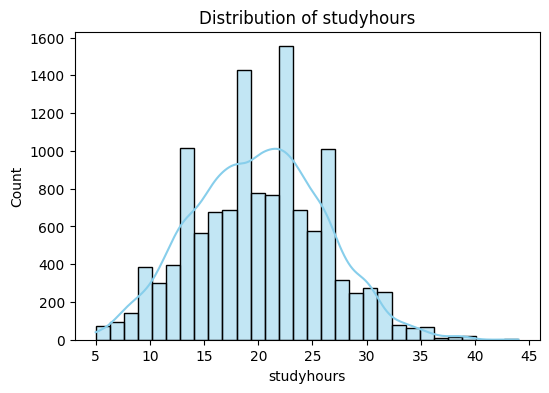

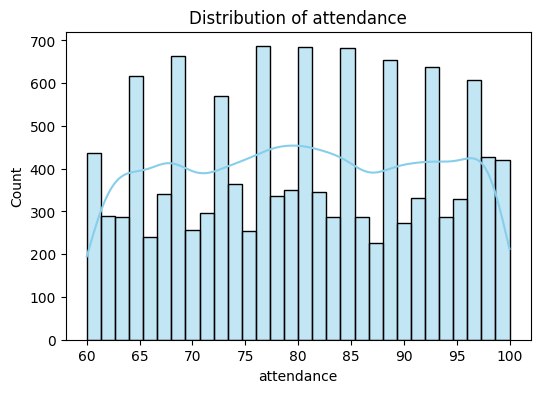

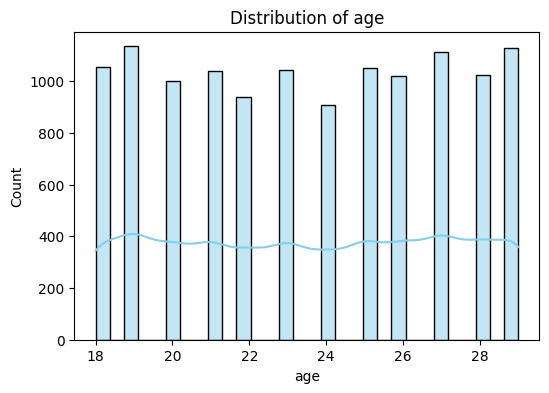

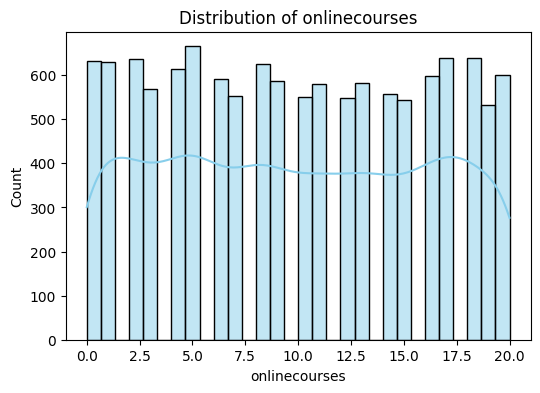

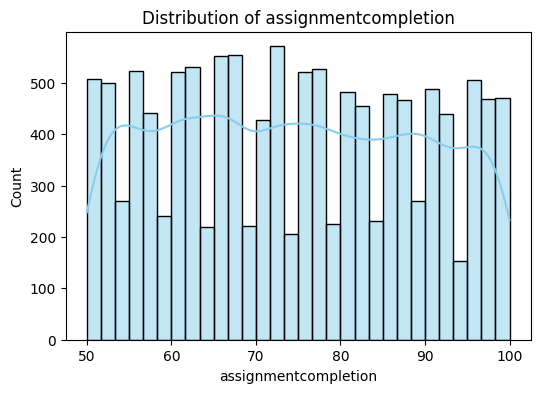

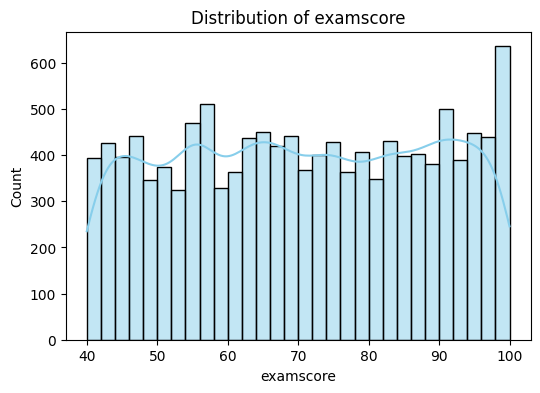

In [51]:
#Univariate Analysis

# Continuous columns only
cont_cols = ['studyhours', 'attendance', 'age', 'onlinecourses', 'assignmentcompletion', 'examscore']

for col in cont_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

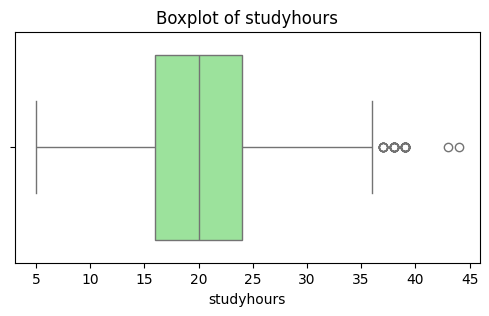

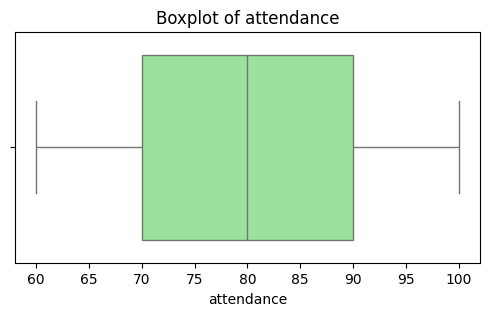

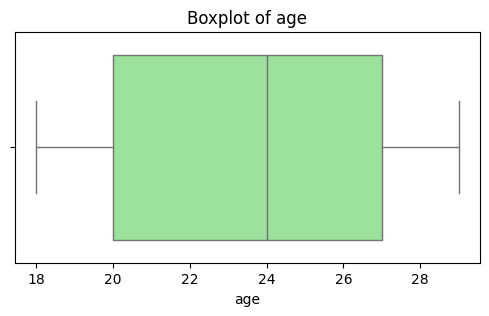

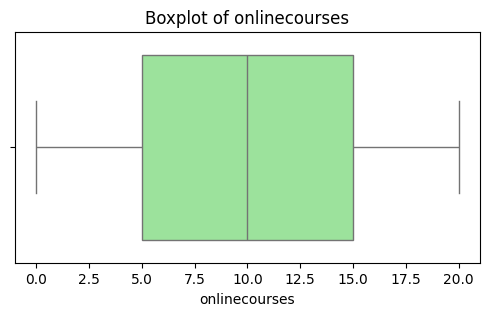

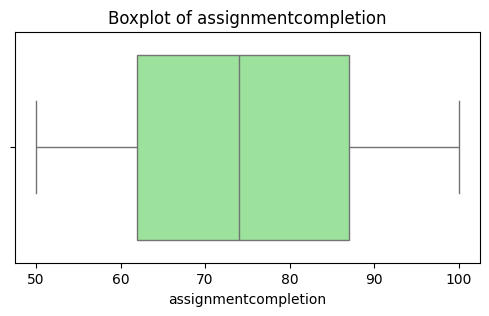

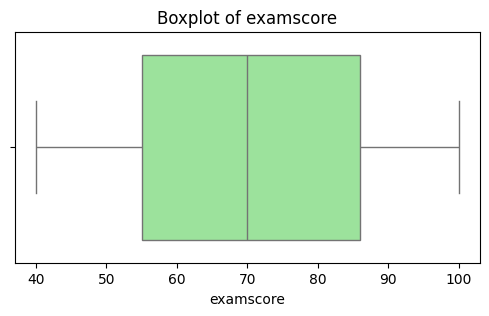

In [54]:
for col in cont_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

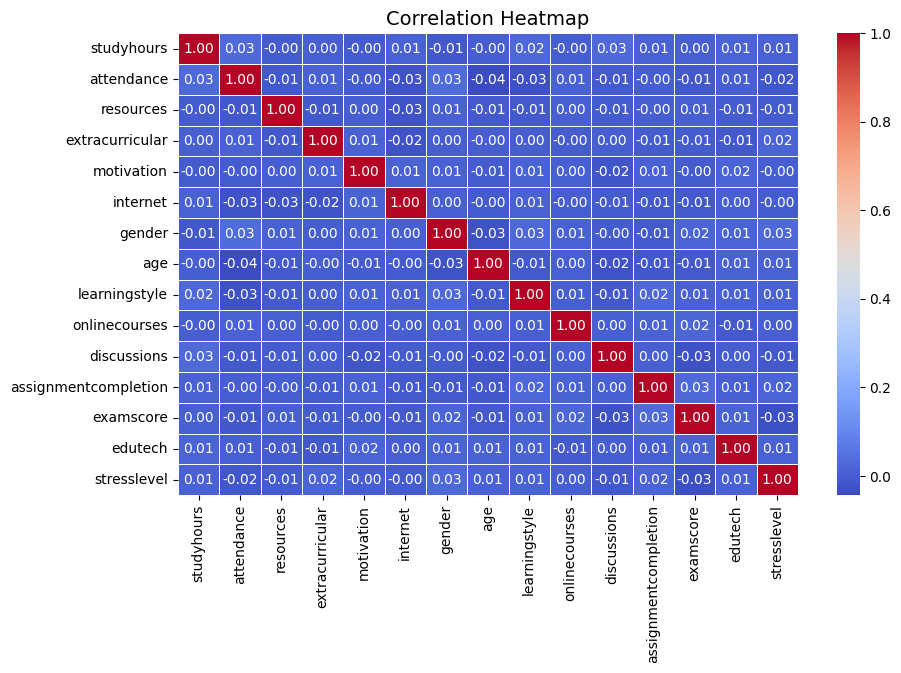

In [55]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Preprocessing

### Outlier Detection

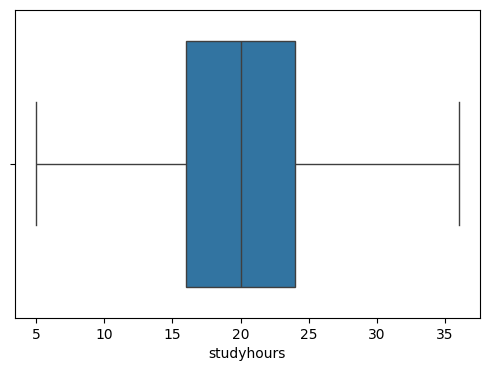

In [56]:
# Detect outliers in the 'studyhours' column using IQR
Q1 = df['studyhours'].quantile(0.25)
Q3 = df['studyhours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_studyhours = df[(df['studyhours'] >= lower_bound) & (df['studyhours'] <= upper_bound)]

plt.figure(figsize=(6,4))
sns.boxplot(x=df_studyhours['studyhours'])
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler

cluster_features = ['studyhours', 'attendance', 'resources', 'extracurricular',
                    'motivation', 'internet', 'age', 'learningstyle',
                    'onlinecourses', 'discussions', 'assignmentcompletion',
                    'examscore', 'stresslevel']

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[cluster_features])

## Dendrogram

In [58]:
import scipy.cluster.hierarchy as clus
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

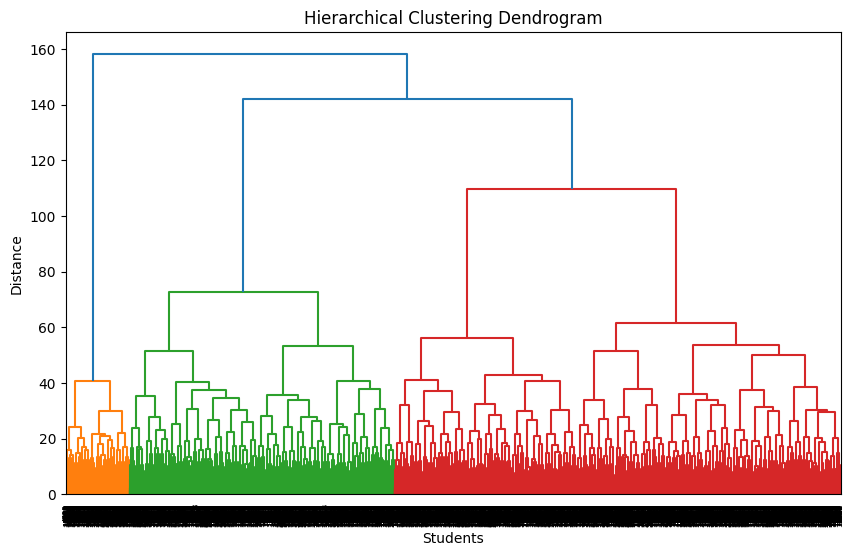

In [59]:
plt.figure(figsize=(10, 6))
dendrogram = clus.dendrogram(clus.linkage(scaled_df, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Students')
plt.ylabel('Distance')
plt.show()

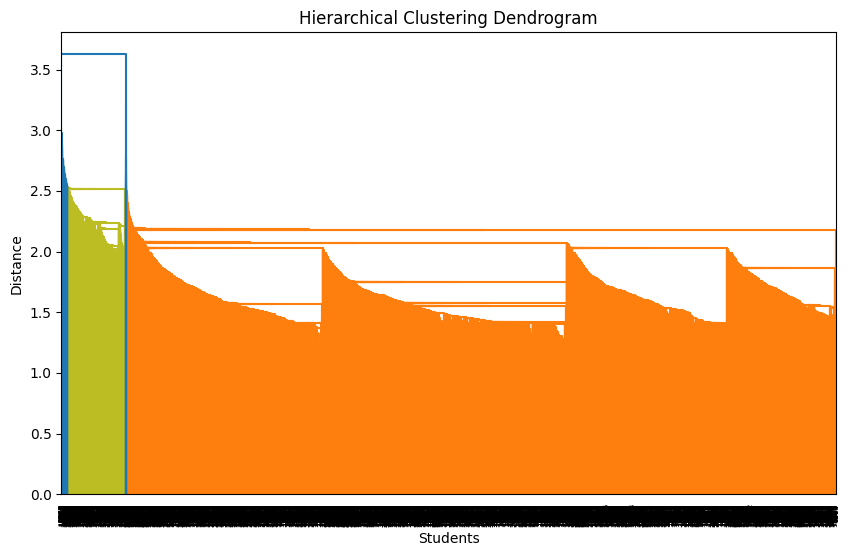

In [60]:
plt.figure(figsize=(10, 6))
dendrogram = clus.dendrogram(clus.linkage(scaled_df, method='single'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Students')
plt.ylabel('Distance')
plt.show()

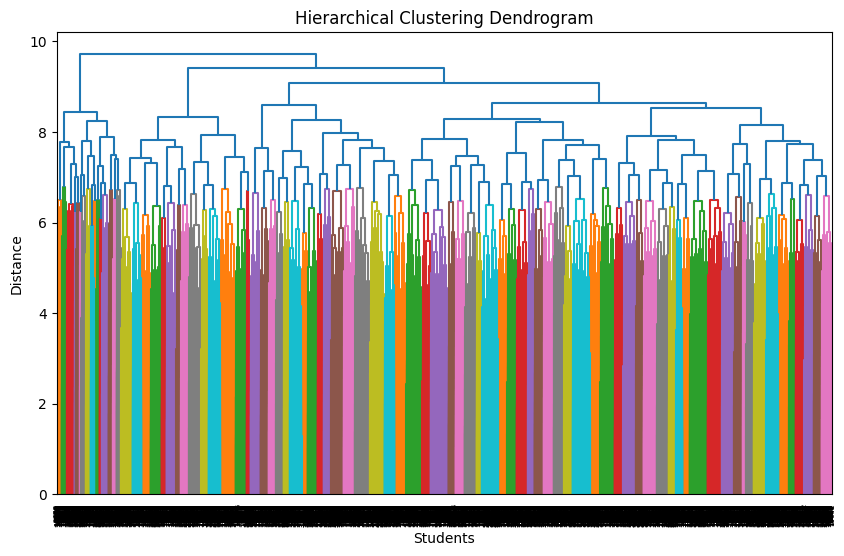

In [61]:
plt.figure(figsize=(10, 6))
dendrogram = clus.dendrogram(clus.linkage(scaled_df, method='complete'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Students')
plt.ylabel('Distance')
plt.show()

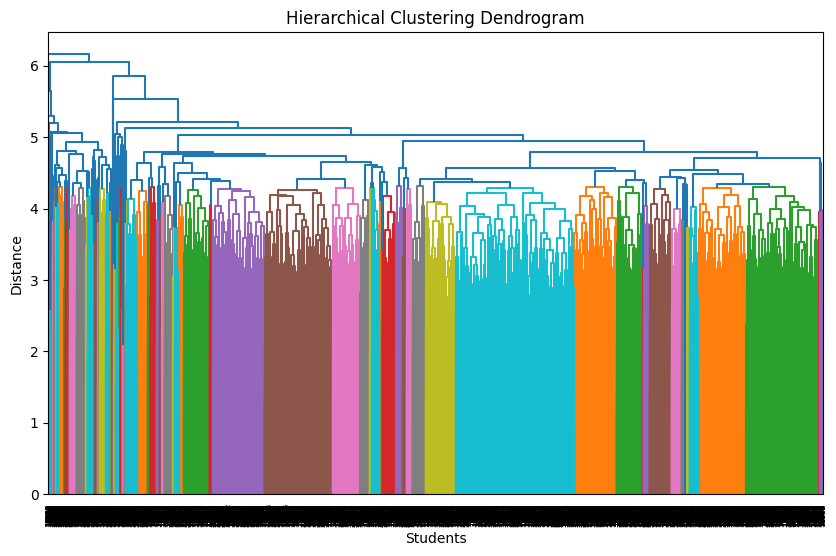

In [62]:
plt.figure(figsize=(10, 6))
dendrogram = clus.dendrogram(clus.linkage(scaled_df, method='average'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Students')
plt.ylabel('Distance')
plt.show()

In [66]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, linkage ='ward')
labels = model.fit_predict(scaled_df)

df['cluster'] = labels

In [67]:
df.groupby('cluster').mean()

,studyhours,attendance,resources,extracurricular,motivation,internet,gender,age,learningstyle,onlinecourses,discussions,assignmentcompletion,examscore,edutech,stresslevel
cluster,,,,,,,,,,,,,,,
0,20.241009,80.069139,1.096181,0.589072,0.896850,1.0,0.539030,23.402425,1.507388,9.858238,0.957764,74.561054,70.064539,0.709367,1.293560
1,19.867505,81.256286,1.160542,0.622824,0.879110,0.0,0.534816,23.567698,1.481625,9.925532,0.617021,74.860735,70.742747,0.700193,1.313346
2,19.727059,80.278808,1.095752,0.563483,0.931941,1.0,0.538841,23.733161,1.536963,9.883361,0.011734,74.354612,70.620277,0.705234,1.323164


## Anova Test

In [78]:
from scipy.stats import f_oneway

features = ['studyhours','attendance','motivation','stresslevel','assignmentcompletion','examscore']

for feature in features:
    clusters = [df[df['cluster']==i][feature] for i in df['cluster'].unique()]
    f, p = f_oneway(*clusters)
    if p < 0.05:
        print(f"✅ {feature} differs significantly across clusters (p={p:.3f})")
    else:
        print(f"❌ No significant difference in {feature} across clusters (p={p:.3f})")

✅ studyhours differs significantly across clusters (p=0.000)
✅ attendance differs significantly across clusters (p=0.008)
✅ motivation differs significantly across clusters (p=0.016)
❌ No significant difference in stresslevel across clusters (p=0.141)
❌ No significant difference in assignmentcompletion across clusters (p=0.561)
❌ No significant difference in examscore across clusters (p=0.191)


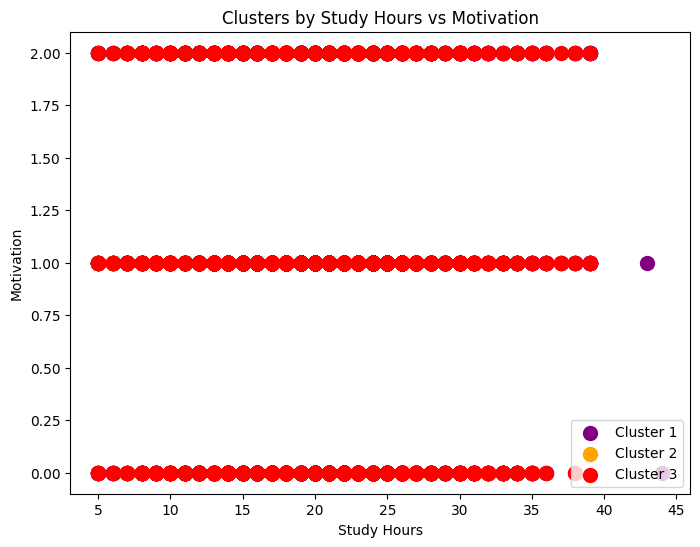

In [82]:
import matplotlib.pyplot as plt

# Study Hours vs Motivation
plt.figure(figsize=(8,6))
plt.scatter(df[df['cluster']==0]['studyhours'], df[df['cluster']==0]['motivation'], s=100, c='purple', label='Cluster 1')
plt.scatter(df[df['cluster']==1]['studyhours'], df[df['cluster']==1]['motivation'], s=100, c='orange', label='Cluster 2')
plt.scatter(df[df['cluster']==2]['studyhours'], df[df['cluster']==2]['motivation'], s=100, c='red', label='Cluster 3')
plt.title('Clusters by Study Hours vs Motivation')
plt.xlabel('Study Hours')
plt.ylabel('Motivation')
plt.legend()
plt.show()

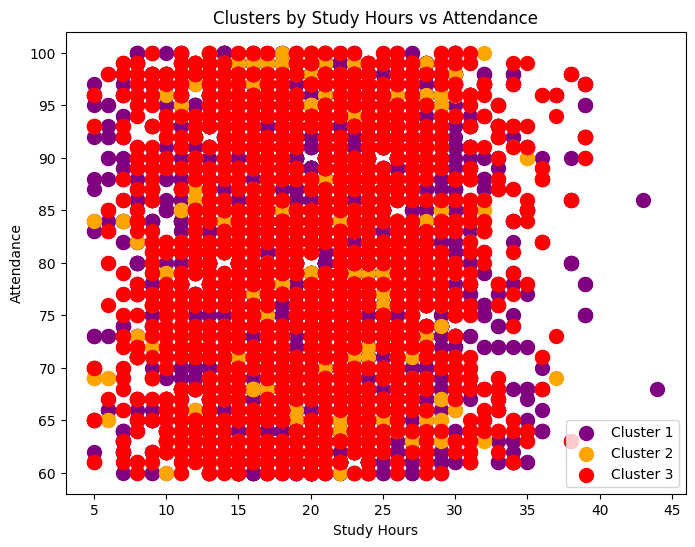

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(df[df['cluster']==0]['studyhours'], df[df['cluster']==0]['attendance'], s=100, c='purple', label='Cluster 1')
plt.scatter(df[df['cluster']==1]['studyhours'], df[df['cluster']==1]['attendance'], s=100, c='orange', label='Cluster 2')
plt.scatter(df[df['cluster']==2]['studyhours'], df[df['cluster']==2]['attendance'], s=100, c='red', label='Cluster 3')
plt.title('Clusters by Study Hours vs Attendance')
plt.xlabel('Study Hours')
plt.ylabel('Attendance')
plt.legend()
plt.show()

# Project Conclusion: Student Clustering Analysis

## Summary of Steps
- **Data Preparation:** Scaled features for fair comparison.
- **Dendrogram:** Guided the choice of 3 clusters.
- **Agglomerative Clustering:** Grouped students into meaningful clusters.
- **Cluster Profiling:** Calculated average values per cluster to understand behavior.
- **ANOVA Tests:** Confirmed significant differences in study hours, attendance, and motivation.
- **Scatter Plots:** Visualized separation based on effort and presence.

## Key Findings
- **Distinct Behavioral Traits:**  
  - Study hours, attendance, and motivation vary significantly across clusters.  
  - Stress levels, assignment completion, and exam scores show no significant differences.  

- **Interpretation:**  
  Clusters reveal **student engagement patterns** rather than performance outcomes.  
  Students differ more in **effort and presence** than in exam results.

## Final Insight
Clustering highlights that academic journeys are shaped less by scores and more by **study rhythms, attendance, and motivation**.  
These hidden patterns provide valuable understanding of how students engage with learning beyond performance metrics.